Выполнить максимально возможный вертикальный сдвиг случайно выбранной цифры набора MNIST, вывести изображения

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_from_binary(path_x_train, path_y_train,
                    path_x_test, path_y_test,
                    imsize):
    
    with open(path_x_train, 'rb') as read_binary:
        x_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_train, 'rb') as read_binary:
        y_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_x_test, 'rb') as read_binary:
        x_test = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_test, 'rb') as read_binary:
        y_test = np.fromfile(read_binary, dtype = np.uint8)
    x_train = np.array(x_train, dtype = 'float32') / 255
    x_test = np.array(x_test, dtype = 'float32') / 255
    x_train = x_train.reshape(-1, imsize * imsize)
    x_test = x_test.reshape(-1, imsize * imsize)
    return x_train, y_train, x_test, y_test

In [60]:
img_rows = img_cols = 28
file_image_train = 'mnist/images_trn.bin'
file_lable_train = 'mnist/labels_trn.bin'
file_image_test = 'mnist/images_tst.bin'
file_lable_test = 'mnist/labels_tst.bin'
x_train, y_train, x_test, y_test = load_from_binary(file_image_train, file_lable_train,
                                                   file_image_test, file_lable_test, img_rows)

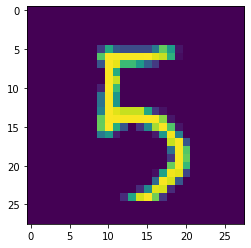

In [164]:
image_indx = np.random.randint(0, x_train.shape[0])
image = x_train[image_indx]
original = image.reshape(img_cols, img_rows).copy()
fig, ax = plt.subplots(1, 1)
ax.imshow(image.reshape(img_cols, img_rows))

In [165]:
image = image.reshape(img_cols, img_rows)
first_pos = 0
last_pos = 0
max_mas = [image[i].max() for i in range(image.shape[0])]
fl = True
for i in range(len(max_mas)):
    if ((max_mas[i]>0) & (fl)):
        fl = False
        first_pos = i
        
fl=True
for i in range(len(max_mas)-1,-1,-1):
    if ((max_mas[i]>0) & (fl)):
        fl = False
        last_pos = i 
        
last_pos = len(max_mas) - last_pos-1

In [166]:
print(max_mas)
print(first_pos, last_pos)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.7607843, 0.99607843, 0.99607843, 0.99607843, 0.99607843, 1.0, 0.99607843, 0.99607843, 0.99607843, 0.99607843, 1.0, 0.9843137, 0.99215686, 0.99215686, 0.99215686, 0.99607843, 0.98039216, 0.99215686, 0.9529412, 0.99607843, 0.0, 0.0, 0.0]
5 3


In [167]:
pos = first_pos if first_pos > last_pos else last_pos

In [168]:
zeros = np.zeros((28, ))
if (first_pos > last_pos):
    print("1")
    for i in range(0, image.shape[0] - first_pos):
        image[i] = image[i + first_pos]
    for i in range(image.shape[0] - first_pos, image.shape[0]):
        image[i] = zeros.copy()
else:
    print("2")
    for i in range(image.shape[0] - 1, last_pos + first_pos, -1):
        image[i] = image[i - last_pos - 1]
    for i in range(0, last_pos + first_pos+1):
        image[i] = zeros.copy()

1


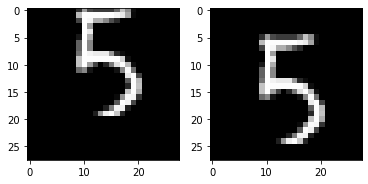

In [169]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image.reshape(img_cols, img_rows), cmap='gray')
ax[1].imshow(original.reshape(img_cols, img_rows), cmap='gray')